The file "microbial_community.trimmed.fastq.gz" contains the fastQ reads of a known microbial community.
A targeted approach was chosen to study the microbial composition:
full-length 16S rRNA gene was amplified by PCR and sequenced using Oxford Nanopore technology (1,2).
Sequencing adapters and PCR primers were removed using the tool cutadapt (3).

Please answer the following questions:
Question_1:
	How many reads are in the dataset?
	What's the average read quality? and the average length?

Question_2:
	Are there any "off target" reads (ex. longer or smaller fragments)?
	If yes, remove them from the dataset.

Question_3:
	Would you include a chimera detection step?
	Justify your answer

Question_4:
	What are the 10 most abundant microbial species?

Question_5:
	Provide further details about the analysis pipeline used



References:
1. Oxford Nanopore GridION device (https://store.nanoporetech.com/eu/gridion.html)
2. Oxford Nanopore sequencing kit (https://store.nanoporetech.com/eu/ligation-sequencing-kit-xl-v14.html)
3. Cutadapt (https://github.com/marcelm/cutadapt)

Question_1:
How many reads are in the dataset? 
What's the average read quality? and the average length?

Number of reads:                90,212.0
Mean read length:                1,453.6
Mean read quality:                  18.8

(Median read length:              1,452.0
Median read quality:                20.8)

Question_2:
Are there any "off target" reads (ex. longer or smaller fragments)? If yes, remove them from the dataset.

Yes, according to NanoPlot and FastQC reports there is a small fraction of off-target reads:
![Non_weightedHistogramReadlength](nanoplot/Non_weightedHistogramReadlength.png)
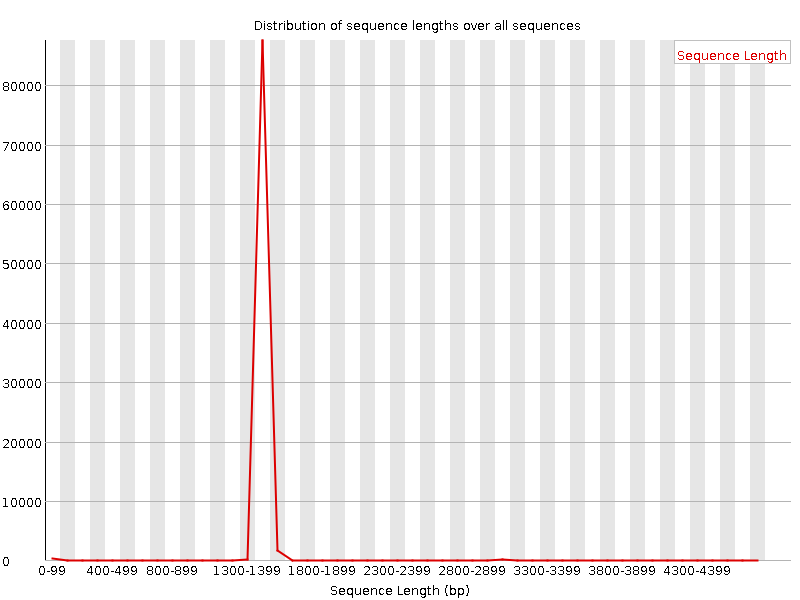

All reads with a length less than 1200 and more than 1800 will be further deleted in the epi2mi pipeline (--min_len 1200 --max_len 1800).

Question_3:
Would you include a chimera detection step? Justify your answer.

Yes, it is necessary to include the step of detection of chimeric reads, since at the stage of adapter ligation during library preparation with Ligation Sequencing Kit, chimeric molecules may appear as a result of concatamerisation.
Moreover, chimeric reads can be formed in silico during the base calling process, when two molecules are sequenced in the same pore one after the other.
Despite the fact that in new versions of the MinKNOW App it is convenient to use the detect_mid_strand_barcodes="on" guppy setting, which will split chimeric reads containing internal technical sequences, I still always add a step in the pipeline that detects chimeric sequences and removes remnants of adapters and barcodes.

Here are the results of the Porechop trimming:

Trimming adapters from read ends
  PCR_2_start: TTTCTGTTGGTGCTGATATTGC
    PCR_2_end: GCAATATCAGCACCAACAGAAA
         BC10: AAGCGTTGAAACCTTTGTCCTCTC
     BC10_rev: GAGAGGACAAAGGTTTCAACGCTT

   291 / 90,212 reads had adapters trimmed from their start (4,007 bp removed)
   113 / 90,212 reads had adapters trimmed from their end (1,296 bp removed)


Discarding reads containing middle adapters
90,212 / 90,212 (100.0%)

246 / 90,212 reads were discarded based on middle adapters

  Barcode  Reads   Bases        File                  
  BC10          9       12,931  porechop/BC10.fastq.gz
  none     89,956  130,386,487  porechop/none.fastq.gz
  
Presumably, the sample was barcoded with BC10, so I combined the outputs of 'BC10' and 'none'.
I usually know which samples were barcoded with which barcode, so I go through this step with more confidence than I do now. If Porechop refers read to an unexpected barcode group, I discard those reads.

Question_4:
What are the 10 most abundant microbial species?

minimap2 classification:
| Bacteroides fragilis          | 10468 | Bacteria;none;Bacteroidota;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides fragilis                         |
| Veillonella dispar            | 8782  | Bacteria;none;Firmicutes;Negativicutes;Veillonellales;Veillonellaceae;Veillonella;Veillonella dispar                         |
| Bifidobacterium adolescentis  | 7416  | Bacteria;none;Actinobacteria;Actinomycetia;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium;Bifidobacterium adolescentis |
| Roseburia hominis             | 6746  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Lachnospiraceae;Roseburia;Roseburia hominis                                |
| Faecalibacterium duncaniae    | 6582  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Oscillospiraceae;Faecalibacterium;Faecalibacterium duncaniae               |
| Veillonella parvula           | 6057  | Bacteria;none;Firmicutes;Negativicutes;Veillonellales;Veillonellaceae;Veillonella;Veillonella parvula                        |
| Prevotella corporis           | 5518  | Bacteria;none;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;Prevotella corporis                           |
| Limosilactobacillus fermentum | 5222  | Bacteria;none;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Limosilactobacillus;Limosilactobacillus fermentum          |
| Fusobacterium nucleatum       | 5030  | Bacteria;none;Fusobacteria;Fusobacteriia;Fusobacteriales;Fusobacteriaceae;Fusobacterium;Fusobacterium nucleatum              |
| Clostridioides difficile      | 4186  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Peptostreptococcaceae;Clostridioides;Clostridioides difficile              |

kraken2 classification::
| Veillonella rogosae               | 11574 | Bacteria;none;Firmicutes;Negativicutes;Veillonellales;Veillonellaceae;Veillonella;Veillonella rogosae                        |
| Bacteroides fragilis              | 10531 | Bacteria;none;Bacteroidota;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides fragilis                         |
| Roseburia hominis                 | 6740  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Lachnospiraceae;Roseburia;Roseburia hominis                                |
| Faecalibacterium prausnitzii      | 6336  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Oscillospiraceae;Faecalibacterium;Faecalibacterium prausnitzii             |
| Prevotella corporis               | 5562  | Bacteria;none;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;Prevotella corporis                           |
| Bifidobacterium adolescentis      | 5427  | Bacteria;none;Actinobacteria;Actinomycetia;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium;Bifidobacterium adolescentis |
| Faecalibacterium butyricigenerans | 5375  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Oscillospiraceae;Faecalibacterium;Faecalibacterium butyricigenerans        |
| Limosilactobacillus fermentum     | 5282  | Bacteria;none;Firmicutes;Bacilli;Lactobacillales;Lactobacillaceae;Limosilactobacillus;Limosilactobacillus fermentum          |
| Fusobacterium nucleatum           | 5054  | Bacteria;none;Fusobacteria;Fusobacteriia;Fusobacteriales;Fusobacteriaceae;Fusobacterium;Fusobacterium nucleatum              |
| Clostridioides difficile          | 4167  | Bacteria;none;Firmicutes;Clostridia;Eubacteriales;Peptostreptococcaceae;Clostridioides;Clostridioides difficile              |

Both classifiers defined most of the most abundant microbial species in the same way. However, since the minimap2 classifier is alignment-based approach, it provides more accurate read assignment than the kraken2, which is a k-mer-based approach. In the tested case, it is reasonable to use the minimap2, as it provides the finest resolution analysis, which allows more accurate classification of reads at the species level.

Question_5:
Provide further details about the analysis pipeline used

QC was performed using FastQC v.0.11.9 and NanoPlot v.1.41.6. Кe-trimming of the samples was carried out using Porechop v.0.2.4. Analysis of the species composition of the sample was carried out using epi2me-labs/wf-metagenomics v2.2.1-g5344ddc with both minimap2 and kraken2 classifiers. Please find the commands used below.

In [ ]:
# FASTQC QUALITY CONTROL
fastqc /home/bioinf/Projects/test/microbial_community.trimmed.fastq.gz -q -t 19 -o /home/bioinf/Projects/test/fastqc

# NANOPLOT QUALITY CONTROL
NanoPlot -t 19 --fastq /home/bioinf/Projects/test/microbial_community.trimmed.fastq.gz -o /home/bioinf/Projects/test/nanoplot

# PORECHOP TRIMMING
porechop -i /home/bioinf/Projects/test/microbial_community.trimmed.fastq.gz --format fastq.gz -b porechop
zcat /home/bioinf/Projects/test/porechop/BC10.fastq.gz /home/bioinf/Projects/test/porechop/none.fastq.gz | gzip > /home/bioinf/Projects/test/porechop/test.mrg.fastq.gz

# EPI2ME READS CLASSIFICATION
nextflow run epi2me-labs/wf-metagenomics --fastq /home/bioinf/Projects/test/porechop/test.mrg.fastq.gz --min_len 1200 --max_len 1800 --classifier minimap2 --threads 8 --out_dir /home/bioinf/Projects/test/epi_minimap2
nextflow run epi2me-labs/wf-metagenomics --fastq /home/bioinf/Projects/test/porechop/test.mrg.fastq.gz --min_len 1200 --max_len 1800 --classifier kraken2 --threads 8 --out_dir /home/bioinf/Projects/test/epi_kraken2